This project is used to culculate the estimate alpha and beta in capm formala.

In [5]:
import pandas as pd
import file_operations
import os
import statsmodels.api as sm
from numpy import nan as nan
from datetime import datetime
import csv

### Get current date as a tag for later use.

In [6]:
Current_Date_TAG_1 = datetime.now().strftime("%Y-%m-%d")

# Getting the E(R_i) and E(R_m) data.

## Getting current working directory and data directory.

In [7]:
# Get current working directory
paths = file_operations.create_project_path("Dissertation Project 1")
chosen_security_file_name = 'K线导出_600873_日线数据.xlsx'
index_file_name = 'K线导出_000001_日线数据.xlsx'
R_f_file_name = 'R_f.xlsx'

Project directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1'
Project data directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data'
Project output directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Output'


## Ask the user if want to change to another file directory

In [11]:
change_security_io = input("Do you want to change the chosen security's data file? (yes or no/y or n): ")
if change_security_io.lower() in ['yes', 'y']:
    chosen_security_file_name = input("Enter new file name for the chosen security's data under 'Data' directory: ")
security_file_path = os.path.join(paths['data_dir'], chosen_security_file_name)
print(f"Choosing security file path: '{security_file_path}'")

change_index_io = input("Do you want to change the index's data file path? (yes or no/y or n): ")
if change_index_io.lower() in ['yes', 'y']:
    index_file_name = input("Enter new file name for the index's data under 'Data' directory: ")
index_file_path = os.path.join(paths['data_dir'], index_file_name)
print(f"Choosing market portfolio file path: '{index_file_path}'")
    
change_R_f_io = input("Do you want to change the R_f's data file name? (yes or no/y or n): ")
if change_index_io.lower() in ['yes', 'y']:
    R_f_file_name = input("Enter new file name for the index's data under 'Data' directory: ")
R_f_file_path = os.path.join(paths['data_dir'], R_f_file_name)
print(f"Choosing risk free rate file path: '{R_f_file_path}'")

Choosing security file path: 'd:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data\K线导出_300133_日线数据.xlsx'
Choosing market portfolio file path: 'd:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data\K线导出_000001_日线数据.xlsx'
Choosing risk free rate file path: 'd:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data\R_f.xlsx'


## Create the i_df and m_df pandas dataframe for chosen security and index 

In [12]:
i_df = file_operations.read_and_return_pd_df(security_file_path)
m_df = file_operations.read_and_return_pd_df(index_file_path)
R_f_df = file_operations.read_and_return_pd_df(R_f_file_path)

The input file path is: 
d:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data\K线导出_300133_日线数据.xlsx
Reading the input file...
The input file path is: 
d:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data\K线导出_000001_日线数据.xlsx
Reading the input file...
The input file path is: 
d:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Data\R_f.xlsx
Reading the input file...


## Change all the data into nice types, e.g securiry code was changed into U6 meaning this is a string that holds up to 6 numbers or characters, head was changed to english, date to datetime datatype, numerical data to float 64

In [13]:
for df in [i_df, m_df]:
    df.dropna(inplace = True)
    file_operations.change_head_to_ENG(df)
    file_operations.change_date_to_datetime(df)
    file_operations.change_numerical_data_to_float64(df)
    file_operations.change_secu_code_to_str(df)
    display(df.info())
    display(df.head())
    display(df.tail())


<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, 0 to 3358
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SECU_CODE   3359 non-null   object        
 1   SECU_NAME   3359 non-null   object        
 2   DATE        3359 non-null   datetime64[ns]
 3   OPENING     3359 non-null   float64       
 4   HIGHEST     3359 non-null   float64       
 5   LOWEST      3359 non-null   float64       
 6   CLOSING     3359 non-null   float64       
 7   CHANGE      3358 non-null   float64       
 8   PCT_CHANGE  3358 non-null   float64       
 9   VOLUME      3359 non-null   float64       
 10  AMOUNT      3359 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 314.9+ KB


None

,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
0,300133,华策影视,2010-10-26,3.92,4.27,3.88,4.18,NaN,NaN,9466438.0,995446328.0
1,300133,华策影视,2010-10-27,4.07,4.08,3.76,3.76,-0.4179,-9.9974,4659326.0,469081864.0
2,300133,华策影视,2010-10-28,3.78,4.07,3.78,3.98,0.2175,5.7812,2948094.0,300774553.0
3,300133,华策影视,2010-10-29,4.03,4.38,3.94,4.38,0.3977,9.9932,2132794.0,230031603.0
4,300133,华策影视,2010-11-01,4.52,4.81,4.50,4.57,0.1923,4.3930,3335369.0,397442329.0


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
3354,300133,华策影视,2025-02-24,8.80,8.88,8.40,8.48,-0.26,-2.9748,171626567.0,1.475695e+09
3355,300133,华策影视,2025-02-25,8.22,8.35,8.12,8.16,-0.32,-3.7736,135325555.0,1.112207e+09
3356,300133,华策影视,2025-02-26,8.37,8.48,8.17,8.24,0.08,0.9804,120369642.0,9.978787e+08
3357,300133,华策影视,2025-02-27,8.21,8.31,7.87,8.02,-0.22,-2.6699,125352359.0,1.009369e+09
3358,300133,华策影视,2025-02-28,7.95,8.05,7.51,7.55,-0.47,-5.8603,108452697.0,8.409836e+08


<class 'pandas.core.frame.DataFrame'>
Index: 8348 entries, 0 to 8347
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SECU_CODE   8348 non-null   object        
 1   SECU_NAME   8348 non-null   object        
 2   DATE        8348 non-null   datetime64[ns]
 3   OPENING     8348 non-null   float64       
 4   HIGHEST     8348 non-null   float64       
 5   LOWEST      8348 non-null   float64       
 6   CLOSING     8348 non-null   float64       
 7   CHANGE      8347 non-null   float64       
 8   PCT_CHANGE  8347 non-null   float64       
 9   VOLUME      8348 non-null   float64       
 10  AMOUNT      8348 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 782.6+ KB


None

,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
0,000001,上证指数,1990-12-19,96.05,99.98,95.79,99.98,NaN,NaN,126000.0,494000.0
1,000001,上证指数,1990-12-20,104.30,104.39,99.98,104.39,4.41,4.4109,19700.0,84000.0
2,000001,上证指数,1990-12-21,109.07,109.13,103.73,109.13,4.74,4.5407,2800.0,16000.0
3,000001,上证指数,1990-12-24,113.57,114.55,109.13,114.55,5.42,4.9666,3200.0,31000.0
4,000001,上证指数,1990-12-25,120.09,120.25,114.55,120.25,5.70,4.9760,1500.0,6000.0


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
8343,000001,上证指数,2025-02-24,3374.08,3384.81,3355.87,3373.03,-6.085,-0.1801,5.981882e+10,8.028471e+11
8344,000001,上证指数,2025-02-25,3345.65,3369.56,3337.84,3346.04,-26.988,-0.8001,5.275786e+10,7.275098e+11
8345,000001,上证指数,2025-02-26,3351.21,3380.21,3351.21,3380.21,34.175,1.0214,5.539920e+10,7.478874e+11
8346,000001,上证指数,2025-02-27,3378.45,3388.78,3353.57,3388.06,7.848,0.2322,5.758150e+10,7.740600e+11
8347,000001,上证指数,2025-02-28,3374.66,3383.19,3318.72,3320.90,-67.162,-1.9823,5.683195e+10,7.580549e+11


In [14]:
display(R_f_df.info())
display(R_f_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    7 non-null      datetime64[ns]
 1   R_f     7 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 244.0 bytes


None

,DATE,R_f
0,2022-01-01,0.0380
1,2022-01-20,0.0370
2,2022-08-22,0.0365
3,2023-06-20,0.0355
4,2023-08-21,0.0345
5,2024-07-22,0.0335
6,2024-10-20,0.0310


## Stores the stock ID as a variable for later use.

In [15]:
Stock_ID_TAG_2 = i_df.iat[0, 0]
print(Stock_ID_TAG_2)
Stock_Name_TAG_3 = i_df.iat[0, 1]
print(Stock_Name_TAG_3)

300133
华策影视


## Drop useless columns & Convert string to float for closing price.

In [16]:
i_df, m_df = [df[['DATE', 'CLOSING']] for df in [i_df, m_df]]
display(i_df.head())
display(m_df.head())

,DATE,CLOSING
0,2010-10-26,4.18
1,2010-10-27,3.76
2,2010-10-28,3.98
3,2010-10-29,4.38
4,2010-11-01,4.57


,DATE,CLOSING
0,1990-12-19,99.98
1,1990-12-20,104.39
2,1990-12-21,109.13
3,1990-12-24,114.55
4,1990-12-25,120.25


## Change the data into the same shape based on time.

Here `df = pd.merge(i_df, m_df, on='DATE', how='inner')`, `i_df` and `m_df` are the dataframe that I want to merge, and on='DATE meaning that this merge will be based on DATE column, and inner means that this will merge the rows that exist a time on both datafram.

In [17]:
df = pd.merge(i_df, m_df, on='DATE', how='inner')
df = df.rename(columns = {'CLOSING_x': 'Chosen Stock Closing Price', 'CLOSING_y': 'Market Portfolio Closing Price'})
df.dropna(inplace = True)
display(df.head())
display(df.info())
display(df.tail())

,DATE,Chosen Stock Closing Price,Market Portfolio Closing Price
0,2010-10-26,4.18,3041.54
1,2010-10-27,3.76,2997.05
2,2010-10-28,3.98,2992.58
3,2010-10-29,4.38,2978.83
4,2010-11-01,4.57,3054.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            3359 non-null   datetime64[ns]
 1   Chosen Stock Closing Price      3359 non-null   float64       
 2   Market Portfolio Closing Price  3359 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 78.9 KB


None

,DATE,Chosen Stock Closing Price,Market Portfolio Closing Price
3354,2025-02-24,8.48,3373.03
3355,2025-02-25,8.16,3346.04
3356,2025-02-26,8.24,3380.21
3357,2025-02-27,8.02,3388.06
3358,2025-02-28,7.55,3320.90


## Getting the percentage change columns

In [18]:
df['i_pct_change'] = df['Chosen Stock Closing Price'].pct_change()
df['m_pct_change'] = df['Market Portfolio Closing Price'].pct_change()
display(df.head())
display(df.info())

,DATE,Chosen Stock Closing Price,Market Portfolio Closing Price,i_pct_change,m_pct_change
0,2010-10-26,4.18,3041.54,NaN,NaN
1,2010-10-27,3.76,2997.05,-0.100478,-0.014627
2,2010-10-28,3.98,2992.58,0.058511,-0.001491
3,2010-10-29,4.38,2978.83,0.100503,-0.004595
4,2010-11-01,4.57,3054.02,0.043379,0.025241


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE                            3359 non-null   datetime64[ns]
 1   Chosen Stock Closing Price      3359 non-null   float64       
 2   Market Portfolio Closing Price  3359 non-null   float64       
 3   i_pct_change                    3358 non-null   float64       
 4   m_pct_change                    3358 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 131.3 KB


None

## Change the time range to 2022-01-01 to 2025-02-28 and Drop the useless column since now we have the percent change column.

Getting the start and the end date.

In [20]:
Start_Date = '2022-01-01'
End_Date = df.iat[-1, 0]
End_Date = End_Date.strftime('%Y-%m-%d')
Sample_Range_TAG_4 = Start_Date + " to " + End_Date
print(Sample_Range_TAG_4)

2022-01-01 to 2025-02-28


In [21]:
df = df.loc[(df['DATE'] > Start_Date) & (df['DATE'] <= End_Date)]
to_drop = ['Chosen Stock Closing Price', 'Market Portfolio Closing Price']
df.drop(to_drop, axis = 1, inplace = True)
display(df.head())
df = df.reset_index(drop=True)
display(df.head())
display(df.info())

,DATE,i_pct_change,m_pct_change
2597,2022-01-04,0.077844,-0.002047
2598,2022-01-05,-0.015278,-0.010228
2599,2022-01-06,-0.014104,-0.002531
2600,2022-01-07,-0.032904,-0.001824
2601,2022-01-10,0.019231,0.003906


,DATE,i_pct_change,m_pct_change
0,2022-01-04,0.077844,-0.002047
1,2022-01-05,-0.015278,-0.010228
2,2022-01-06,-0.014104,-0.002531
3,2022-01-07,-0.032904,-0.001824
4,2022-01-10,0.019231,0.003906


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          762 non-null    datetime64[ns]
 1   i_pct_change  762 non-null    float64       
 2   m_pct_change  762 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.0 KB


None

In [22]:
print(Start_Date)
print(End_Date)
print(Stock_ID_TAG_2)
print(Stock_Name_TAG_3)
print(Sample_Range_TAG_4)

2022-01-01
2025-02-28
300133
华策影视
2022-01-01 to 2025-02-28


## Add a new column of R_f

### Define a function that calculate the R_f for daily changes from yearly.

In [23]:
def yearly_to_daily(R_f_y):
    return ((R_f_y + 1) ** (1 / 365)) - 1
R_f_df = R_f_df.sort_values(by='DATE')
display(R_f_df)
R_f_df['R_f'] = yearly_to_daily(R_f_df['R_f'])
display(R_f_df)

,DATE,R_f
0,2022-01-01,0.0380
1,2022-01-20,0.0370
2,2022-08-22,0.0365
3,2023-06-20,0.0355
4,2023-08-21,0.0345
5,2024-07-22,0.0335
6,2024-10-20,0.0310


,DATE,R_f
0,2022-01-01,0.000102
1,2022-01-20,0.000100
2,2022-08-22,0.000098
3,2023-06-20,0.000096
4,2023-08-21,0.000093
5,2024-07-22,0.000090
6,2024-10-20,0.000084


In [24]:
df = pd.merge_asof(df, R_f_df, on='DATE', direction='backward')

In [25]:
display(df.info())
display(df['R_f'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          762 non-null    datetime64[ns]
 1   i_pct_change  762 non-null    float64       
 2   m_pct_change  762 non-null    float64       
 3   R_f           762 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.9 KB


None

array([1.02185453e-04, 9.95444864e-05, 9.82230507e-05, 9.55782710e-05,
       9.29309430e-05, 9.02810618e-05, 8.36451557e-05])

## Getting R_i and R_m for each consecutive day. 

In [26]:
E_R_i = df['i_pct_change'].mean()
E_R_m = df['m_pct_change'].mean()
display(df)
print(f"E(R_i): ", E_R_i)
print(f"E(R_m): ", E_R_m)

,DATE,i_pct_change,m_pct_change,R_f
0,2022-01-04,0.077844,-0.002047,0.000102
1,2022-01-05,-0.015278,-0.010228,0.000102
2,2022-01-06,-0.014104,-0.002531,0.000102
3,2022-01-07,-0.032904,-0.001824,0.000102
4,2022-01-10,0.019231,0.003906,0.000102
...,...,...,...,...
757,2025-02-24,-0.029748,-0.001799,0.000084
758,2025-02-25,-0.037736,-0.008002,0.000084
759,2025-02-26,0.009804,0.010212,0.000084
760,2025-02-27,-0.026699,0.002322,0.000084


E(R_i):  0.0009014797227044584
E(R_m):  -6.443108356686847e-05


In [27]:
df.dropna(inplace = True)
display(df.head())
display(df.info())

,DATE,i_pct_change,m_pct_change,R_f
0,2022-01-04,0.077844,-0.002047,0.000102
1,2022-01-05,-0.015278,-0.010228,0.000102
2,2022-01-06,-0.014104,-0.002531,0.000102
3,2022-01-07,-0.032904,-0.001824,0.000102
4,2022-01-10,0.019231,0.003906,0.000102


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          762 non-null    datetime64[ns]
 1   i_pct_change  762 non-null    float64       
 2   m_pct_change  762 non-null    float64       
 3   R_f           762 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.9 KB


None

## Get excess_return_i and excess_return_m

In [28]:
df['excess_return_i'] = df['i_pct_change'] - df['R_f']
df['excess_return_m'] = df['m_pct_change'] - df['R_f']
display(df.head())

,DATE,i_pct_change,m_pct_change,R_f,excess_return_i,excess_return_m
0,2022-01-04,0.077844,-0.002047,0.000102,0.077742,-0.002149
1,2022-01-05,-0.015278,-0.010228,0.000102,-0.015380,-0.010330
2,2022-01-06,-0.014104,-0.002531,0.000102,-0.014207,-0.002633
3,2022-01-07,-0.032904,-0.001824,0.000102,-0.033006,-0.001926
4,2022-01-10,0.019231,0.003906,0.000102,0.019129,0.003803


# Fitting the CAPM model

In [29]:
X = sm.add_constant(df['excess_return_m'])
capm_model = sm.OLS(df['excess_return_i'], X).fit()

In [30]:
alpha = capm_model.params['const']
beta = capm_model.params['excess_return_m']
Alpha_TAG_5 = alpha
Beta_TAG_6 = beta
print("Alpha:", alpha)
print("Beta:", beta)

Alpha: 0.0010789531855322167
Beta: 1.710992426215429


# Checking the model and the regression line.

Deleted existing file: d:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Output\Output Figure\300133.png.
Recreated a new image at: d:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Output\Output Figure\300133.png.


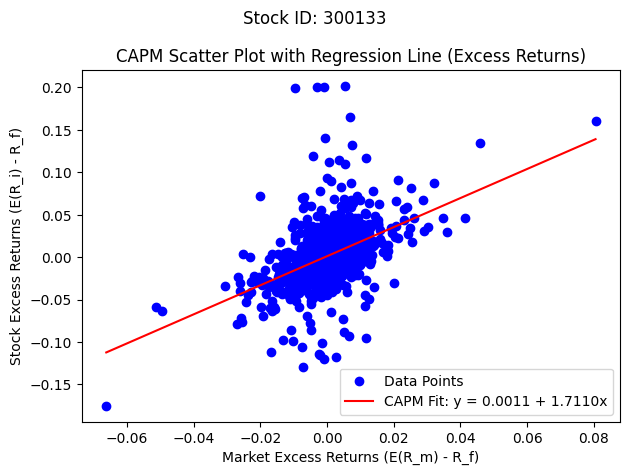

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract x (market returns) and y (stock returns)
x = df['excess_return_m']
y = df['excess_return_i']

# Plot scatter points
plt.scatter(x, y, color='blue', label='Data Points')
# plt.rcParams['font.family'] = 'Arial Unicode MS'

# Create a line for the CAPM regression
x_line = np.linspace(x.min(), x.max(), 100)
y_line = alpha + beta * x_line

# Plot the CAPM regression line
plt.plot(x_line, y_line, color='red', label=f'CAPM Fit: y = {alpha:.4f} + {beta:.4f}x')

# Labeling the plot
plt.xlabel('Market Excess Returns (E(R_m) - R_f)')
plt.ylabel('Stock Excess Returns (E(R_i) - R_f)')
plt.title('CAPM Scatter Plot with Regression Line (Excess Returns)')
plt.suptitle(f"Stock ID: {Stock_ID_TAG_2}")
plt.legend()
plt.tight_layout()

output_directory = paths['output_dir']
output_img_directory = os.path.join(output_directory, 'Output Figure')
os.makedirs(output_img_directory, exist_ok=True)
output_img = os.path.join(output_img_directory, Stock_ID_TAG_2 + ".png")
if os.path.exists(output_img):
    os.remove(output_img)
    print(f"Deleted existing file: {output_img}.")
    plt.savefig(output_img)
    print(f"Recreated a new image at: {output_img}.")
else:
    plt.savefig(output_img)
    print(f"Figure Saved to :{output_img}. ")

plt.show()

# Storing all of the data into a output file.

In [33]:
output_csv_directory = os.path.join(output_directory, 'Output CSV')
print(output_csv_directory)
os.makedirs(output_csv_directory, exist_ok=True)

d:\Important Files\Repositories\Machine-Learning-Project-related\Dissertation Project 1\Output\Output CSV


In [34]:
csv_path = os.path.join(output_csv_directory, 'output_history.csv')
header = ['Run Date', 'Stock ID', 'Stock Name', 'Sample Range', 'Alpha', 'Beta']

In [35]:
csv_file_exists = os.path.isfile(csv_path)
with open(csv_path, 'a', newline = '', encoding = 'utf-8') as f:
    writer = csv.DictWriter(f, fieldnames = header)
    if not csv_file_exists:
        writer.writeheader()  # Write header if file is new
    # Append the new data as a row
    writer.writerow({
        'Run Date': Current_Date_TAG_1,
        'Stock ID': Stock_ID_TAG_2,
        'Stock Name': Stock_Name_TAG_3,
        'Sample Range': Sample_Range_TAG_4,
        'Alpha': Alpha_TAG_5,
        'Beta': Beta_TAG_6
    })
print("Data appended successfully!")

Data appended successfully!


## Getting all the columns

In [36]:
print(f"Column 1: {Current_Date_TAG_1}")
print(f"Column 2: {Stock_ID_TAG_2}")
print(f"Column 3: {Stock_Name_TAG_3}")
print(f"Column 4: {Sample_Range_TAG_4}")
print(f"Column 5: {Alpha_TAG_5}")
print(f"Column 6: {Beta_TAG_6}")

Column 1: 2025-03-09
Column 2: 300133
Column 3: 华策影视
Column 4: 2022-01-01 to 2025-02-28
Column 5: 0.0010789531855322167
Column 6: 1.710992426215429
